In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data loading and preparing with Pandas
print("Loading Data...")
try:
  df = pd.read_csv("online_retail_II.csv")
  print("Data Loaded Successfully")
except FileNotFoundError:
  print("File Not Found")
  raise
df.head()


Loading Data...
Data Loaded Successfully


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:

#Cleaning and Preprocessing
print("\nCleaning and preparing data...")

#converting invoice to proper datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#remove rows with missing customer id
df.dropna(subset=['Customer ID'], inplace=True)

#filtering cancelled orders and items with zero or negative price
df = df[df['Quantity'] > 0]
df = df[df['Price']>0]

#creating revenue column
df['Revenue'] = df['Quantity'] * df['Price']

#creating column for grouping
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df.head()
print("Data Cleaning completed")



Cleaning and preparing data...
Data Cleaning completed


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [ ]:
#Data Analysis and AGGREGATION
print("\nCalculating the monthly revenue...")

#groupby yearmonth and sum the revenue
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()
print(monthly_revenue)


Calculating the monthly revenue...
   YearMonth      Revenue
0    2009-12   686654.160
1    2010-01   557319.062
2    2010-02   506371.066
3    2010-03   699608.991
4    2010-04   594609.192
5    2010-05   599985.790
6    2010-06   639066.580
7    2010-07   591636.740
8    2010-08   604242.650
9    2010-09   831615.001
10   2010-10  1036680.000
11   2010-11  1172336.042
12   2010-12   884591.890
13   2011-01   569445.040
14   2011-02   447137.350
15   2011-03   595500.760
16   2011-04   469200.361
17   2011-05   678594.560
18   2011-06   661213.690
19   2011-07   600091.011
20   2011-08   645343.900
21   2011-09   952838.382
22   2011-10  1039318.790
23   2011-11  1161817.380
24   2011-12   518210.790


Generating Visualizations....


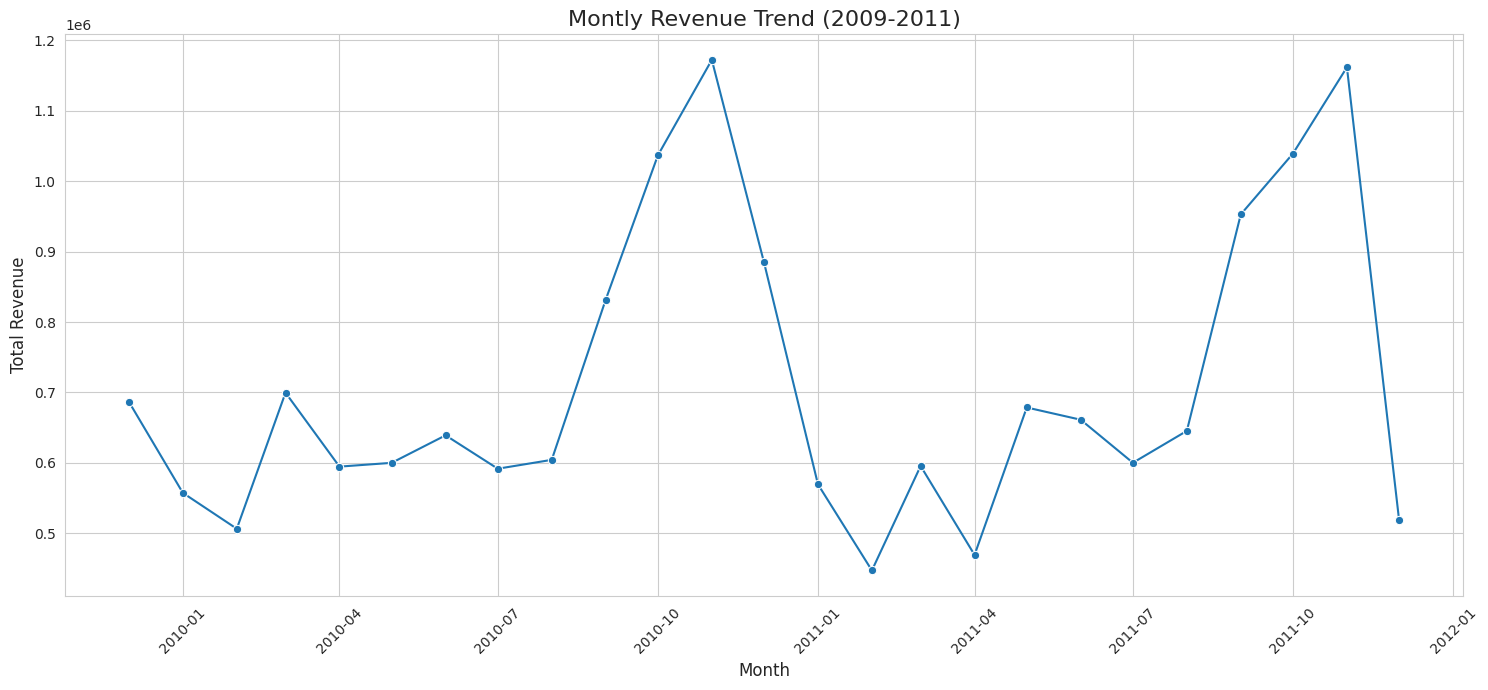

In [23]:
#Data Visualizations
print("Generating Visualizations....")
sns.set_style("whitegrid")
#monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].to_timestamp()
#Visual 1 revenue tren over time line plot
plt.figure(figsize=(15, 7))
sns.lineplot(
    x= 'YearMonth',
    y= 'Revenue',
    data = monthly_revenue,
    marker='o',
    sort=False
)
plt.title('Montly Revenue Trend (2009-2011)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2691389881.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


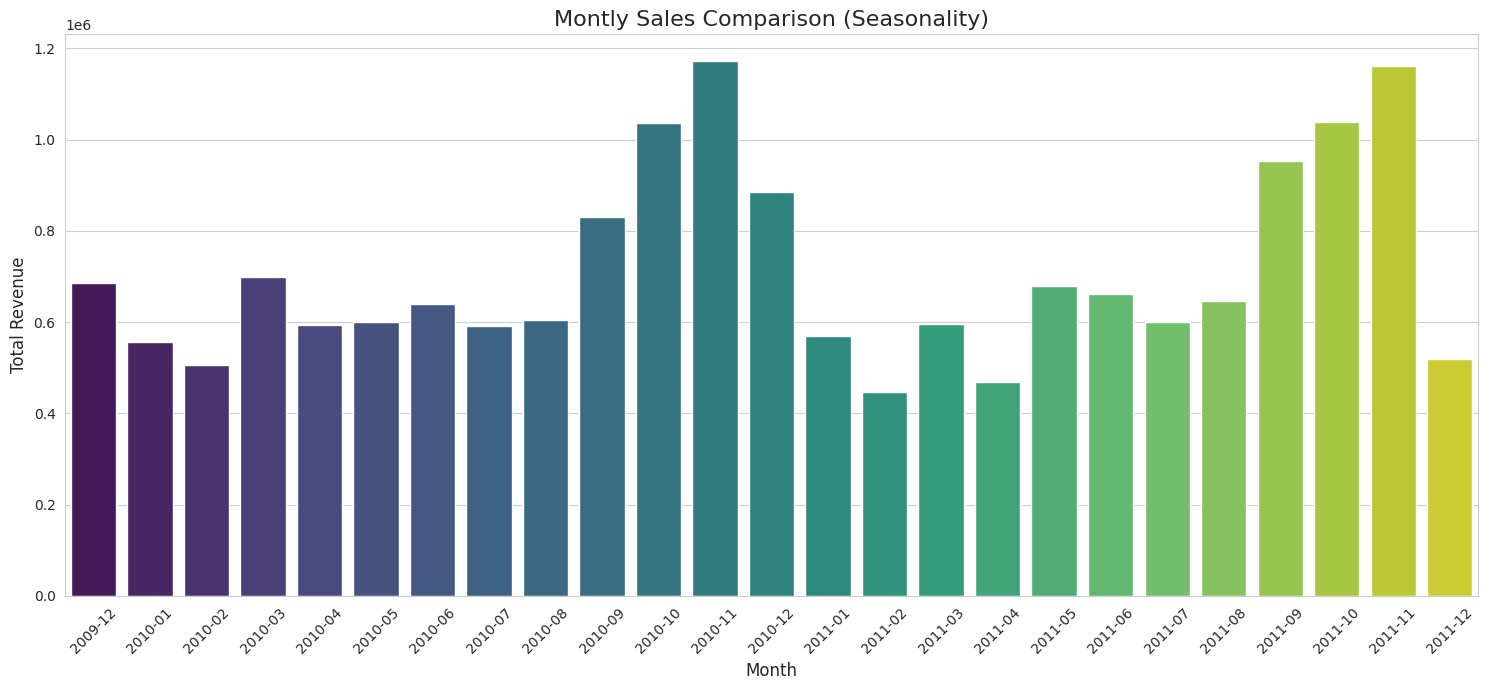

In [ ]:
#Visualization 2: Seasonal sales Pattern using barplot
#for bar plot it's often better to have string labels
#converting timestamp to string format 'YYYY-MM'
monthly_revenue['YearMonth_str'] = monthly_revenue['YearMonth'].dt.strftime('%Y-%m')

plt.figure(figsize=(15, 7))
sns.barplot(
    x='YearMonth_str',
    y='Revenue',
    data = monthly_revenue,
    palette = 'viridis'
)
plt.title('Montly Sales Comparison (Seasonality)', fontsize= 16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()